In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Loan_default.csv')

# Data Overview

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.shape

(255347, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [8]:
df[df.duplicated()]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


# Descriptive Statistics

In [9]:
df.describe().transpose().T

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


# Visualization

**Age Distribution**

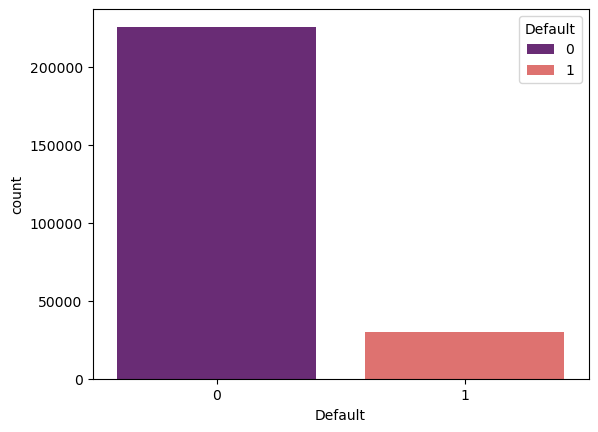

In [10]:
sns.countplot(x = 'Default', data =df, palette = 'magma', hue='Default')
plt.show()

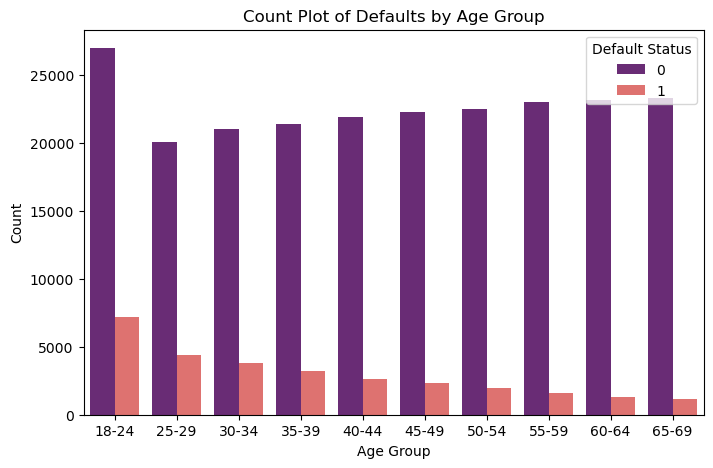

In [11]:
# Define function to group age into bins with specific ranges
def group_age(df, age_column='Age'):
    # Define the age bins and labels with specified intervals
    bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]
    labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69']
    
    # Create a new column 'Age Group' using pd.cut
    df['Age Group'] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df

# Apply the ag
# Apply the age grouping function
df = group_age(df)
# Create a count plot with 'Age Group' on the x-axis and 'Default' as hue
plt.figure(figsize=(8, 5))
sns.countplot(x='Age Group', data=df, hue='Default', palette='magma')

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count Plot of Defaults by Age Group')
plt.legend(title='Default Status', loc='upper right')

In [12]:
df_num = df.select_dtypes(exclude = ['object']).drop(['Default','DTIRatio','LoanTerm', 'Age Group'], axis = 1)

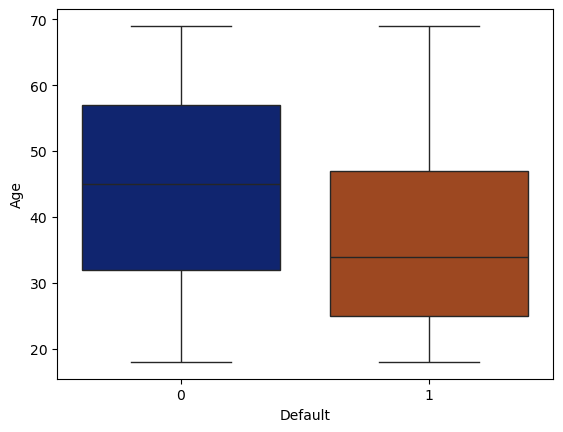

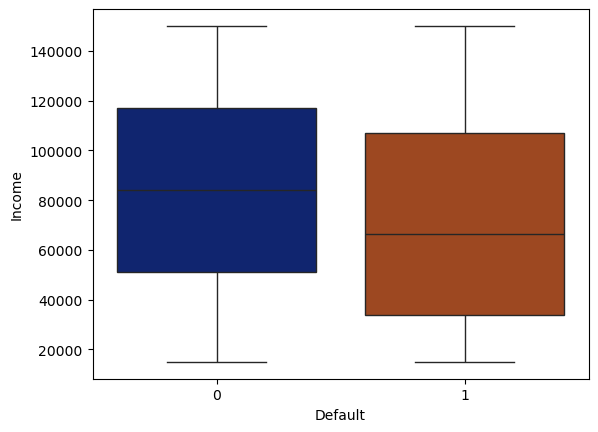

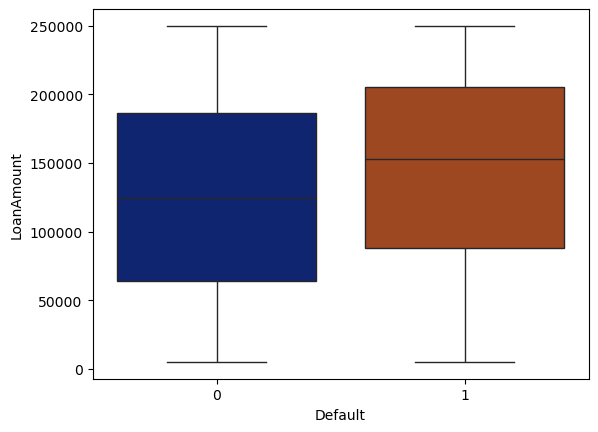

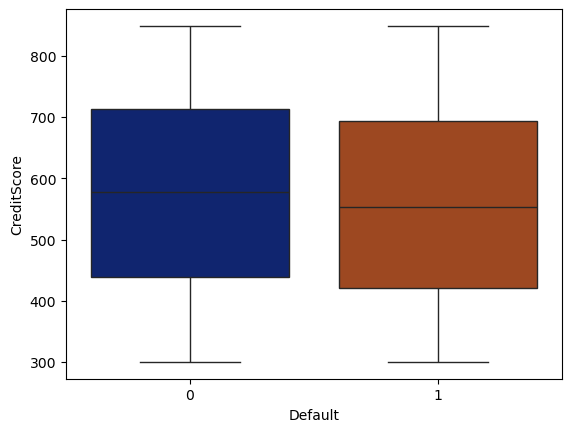

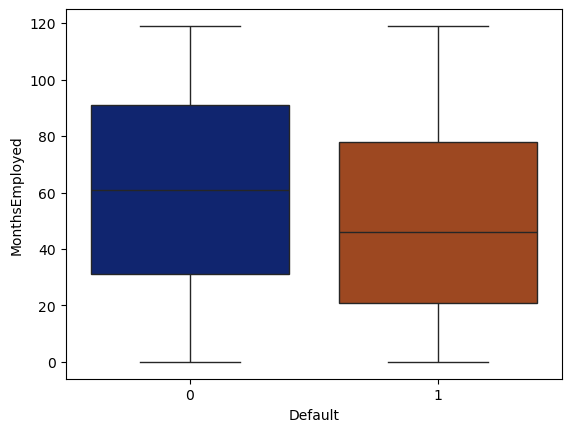

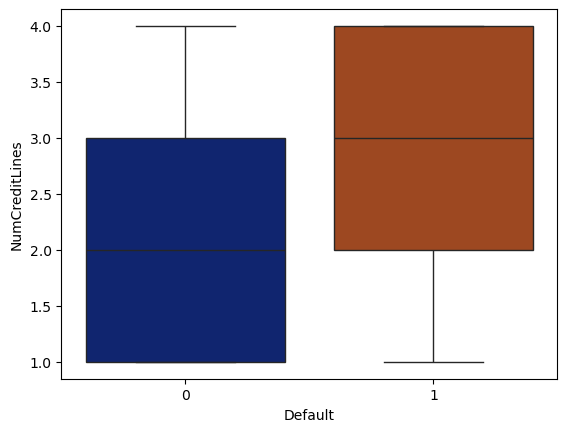

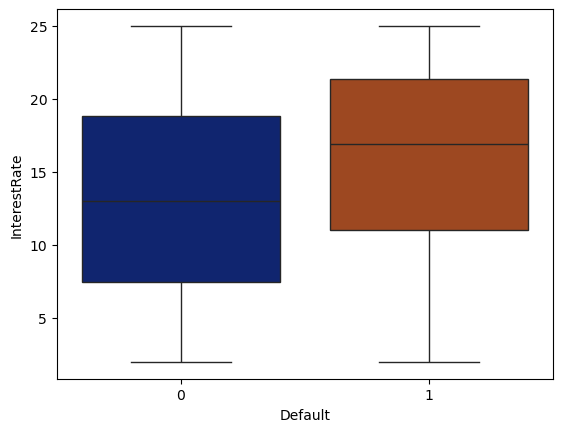

In [13]:
for col in df_num:
    sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')
    plt.show()

# Interpretation

1. Older people are seen less likely to default

2. The dafaulters are seen with lower avg income

3. The dafaulters are seen with larger Loan Amount and lesser credit score

4. People having higher Interest rate are more likely to default

# Correlation

<Axes: >

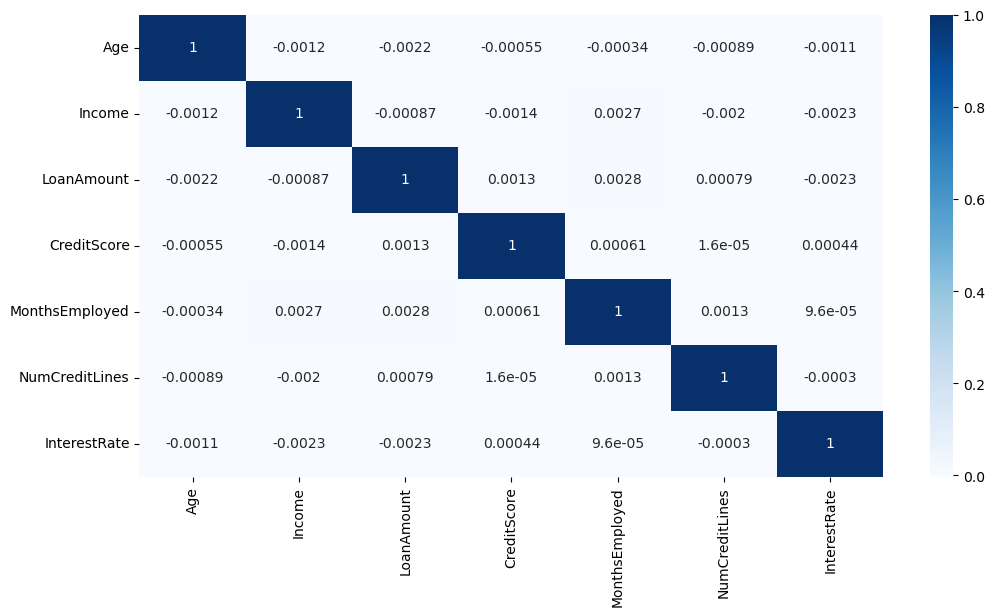

In [14]:
plt.figure(figsize = (12,6))
sns.heatmap(df_num.corr(), annot = True, cmap = 'Blues')

**No significant correlation found**

# **ScatterPlot**

<Axes: xlabel='Income', ylabel='LoanAmount'>

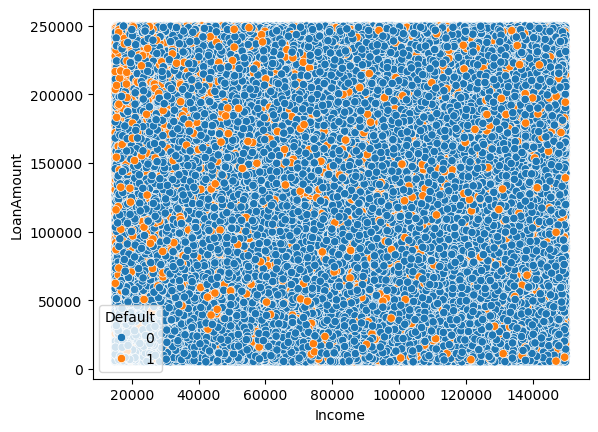

In [15]:
sns.scatterplot( x = 'Income' , y = 'LoanAmount', data =df,hue = 'Default')

No as such relationship found , the defaulters are spread between both low and high income

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree

# Feature and target segregation

In [17]:
# dropping Loan ID
df.drop('LoanID', axis = 1 , inplace = True)

In [18]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age Group
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,55-59
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,65-69
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,45-49
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,30-34
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,60-64


In [19]:
x = df.drop('Default', axis = 1)
y = df['Default']

# Label Encoding

In [20]:
# filtering only non numeric col
df_obj = df.select_dtypes(include=['object'])

In [21]:
enc = LabelEncoder()
for col in df_obj:
    x[col] = enc.fit_transform(x[col])

Categorical(Textual) columns are now converted into Numerical data

In [22]:
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Age Group
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,55-59
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,65-69
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,45-49
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,30-34
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,60-64


In [23]:

x.drop(columns=['Age Group'], inplace=True)
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0


# Standardization

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [25]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [26]:
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0.000000,0.0,0.0,1.0,1.0,1.00,1.0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.666667,0.0,0.5,0.0,0.0,1.00,1.0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,0.666667,1.0,0.0,1.0,1.0,0.00,0.0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0.333333,0.0,0.5,0.0,0.0,0.25,0.0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.000000,1.0,0.0,0.0,1.0,0.00,0.0


**Features are now standardized**

# Splitting the Data into train and test part

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape, x_test.shape

((204277, 16), (51070, 16))

# Perform Simple Minority OverSamping Technique - SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Apply SMOTE only to the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Independence

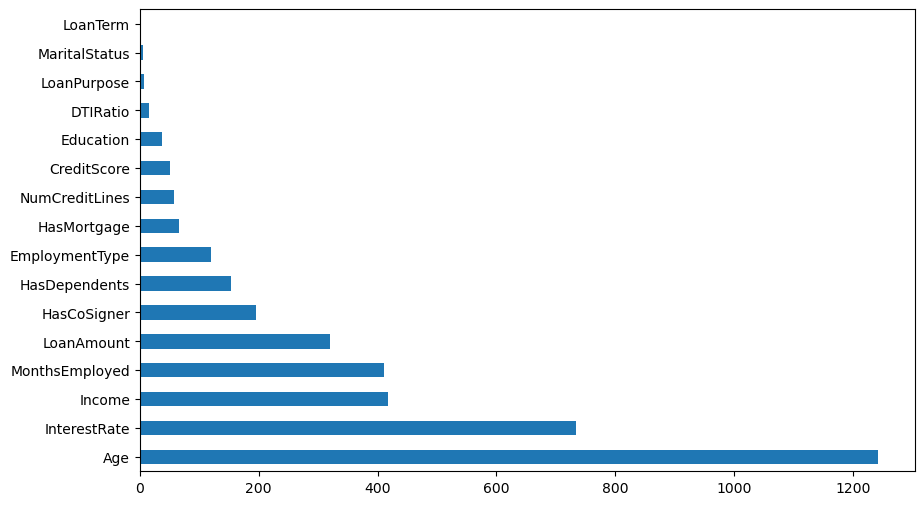

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x, y)

plt.figure(figsize=(10, 6))
model = pd.Series(fit.scores_, index=x.columns)
model.nlargest(35).plot(kind='barh')
plt.show()

# Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#import xgboost as xgb

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=1, criterion='entropy'),
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    #'XGBoost': xgb.XGBClassifier(random_state=1)
}

# List to store model metrics
models_metrics = []

# Evaluate each model
for name, model in models.items():
    # Fit the model on the resampled training set
    model.fit(x_train_smote, y_train_smote)

    # Predict on the test data (unbalanced original test set)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate the metrics
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    auc = round(roc_auc_score(y_test, y_pred_proba), 4) if y_pred_proba is not None else 'N/A'

    # Append the metrics to the list
    models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    })

# Convert the results into a DataFrame for better visualization
metrics_df = pd.DataFrame(models_metrics)

# Print the results table
metrics_df


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Decision Tree,0.6656,0.2933,0.1941,0.5995,0.6881
1,Logistic Regression,0.6820,0.3320,0.2193,0.6827,0.7485
2,Random Forest,0.8707,0.2383,0.3748,0.1747,0.7277
3,Gradient Boosting,0.8707,0.2680,0.3886,0.2045,0.7365


# Fitting the training Data

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming x_train, x_test, y_train, y_test are already split

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Train the XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(x_train_smote, y_train_smote)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test,y_pred))

Accuracy: 0.8854
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45158
           1       0.53      0.09      0.16      5912

    accuracy                           0.89     51070
   macro avg       0.71      0.54      0.55     51070
weighted avg       0.85      0.89      0.85     51070



# Predictions

In [33]:
y_pred = xgb_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Accuracy Evaluation

In [34]:
accuracy_score(y_test,y_pred)

0.8853925983943607

## Feature importance

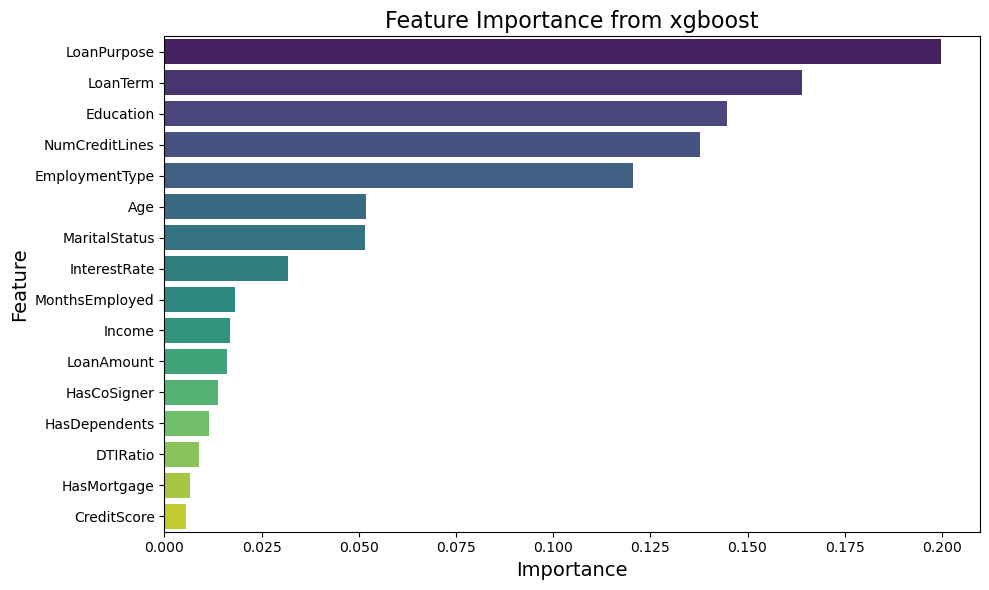

In [35]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization (assuming X_train has the feature names)
features = x_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Add titles and labels
plt.title('Feature Importance from xgboost', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


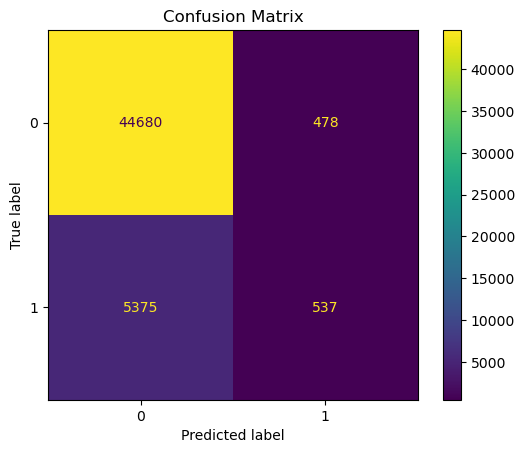

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Specify the labels (0, 1) or use your specific classes
disp.plot()

# Show the plot
plt.title("Confusion Matrix")
plt.show()

**So, we are getting approximately 89% accuracy**

# SHAP (SHapley Additive exPlanations)

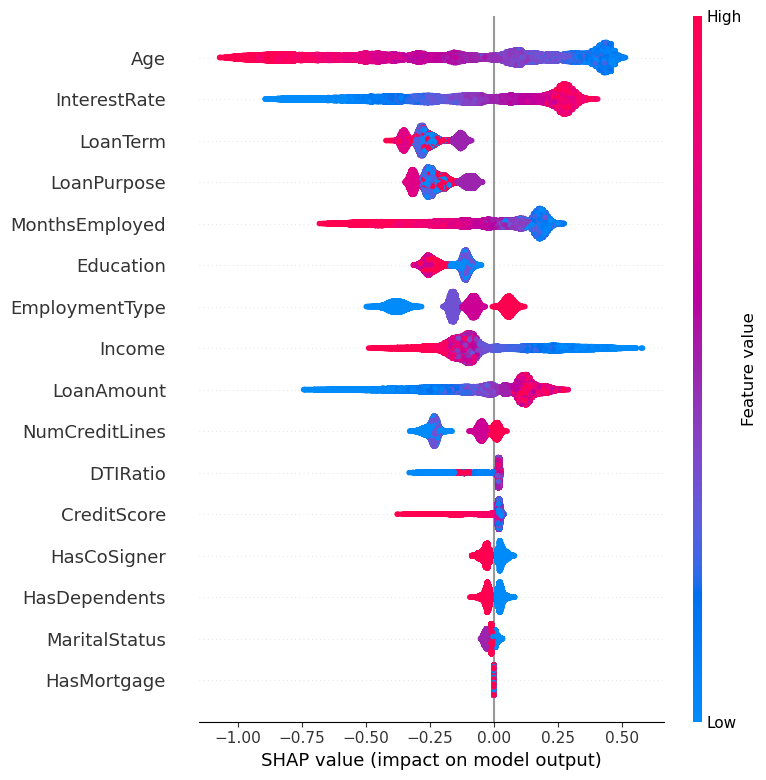

In [39]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


# Feature Importance Explanation:

Age (15.6%): Age is the most significant factor. Typically, older customers are more financially stable and less likely to default, while younger borrowers might face more uncertainty in their financial situation

s.
Interest Rate (9.1%): Higher interest rates increase the monthly payment burden, making it harder for customers to keep up with payments, thus raising the risk of defau

lt.
Has Dependents (8.9%): Customers with dependents often have higher financial obligations, which can increase the strain on their resources, making them more susceptible to defaulting on lo


ns.
Has Co-Signer (8.0%): Having a co-signer reduces the risk of default because the co-signer provides an additional layer of financial responsibility. Borrowers with a co-signer are considered less r

isky.
Income (7.6%): While income is important, it ranks lower than other factors. Higher income generally means more disposable income to manage loan payments, though it's not the only determinant of financial h

ealth.
Loan Amount (6.7%): Larger loan amounts are a financial burden, and a higher loan size relative to income could increase defaul
t###  risk.
Additional F
a**ors:

• Months Employ**ed (6.7%): Longer employment history suggests more stable income, reducing defatter loan terms.

# Recommendation:

1. Focus on Age and Dependents: 

When evaluating loan applications, consider age and whether the customer has dependents as significant risk factors. Younger borrowers and those with dependents may require more stringent loan conditions or additional screening.

2. Promote Co-Signer Options: 

Encourage customers, especially younger or higher-risk borrowers, to secure a co-signer. This not only lowers their default risk but also makes loans more accessible.

3. Credit Score Monitoring: 

Ensure that customers with lower credit scores undergo a stricter approval process. Offer credit improvement plans for borderline cases to help them qualify for better loan terms.